<a href="https://colab.research.google.com/github/carlibeisel/pod_pou_lulcc/blob/main/*water_rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Rights in the Treasure Valley for Diversions

By: Carli Beisel


Created on August 2024


Purpose:

1) Crop Water Rights layer to drainshds in the Treasure Valley and also create a separate file that organizes all WR based on priorty year + surface/groundwater.


2) Create a figure showing the difference between surface + groundwater rights in diversions.


## 1. Organize IDWR Water Right Data from GIS Data Hub

Separate based on surface/groundwater rights and organize based on priority year.  

In [1]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# --------------------------------------- #
#       Crop WR to Diversion POUs         #
# --------------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
div_pou = gpd.read_file('/content/drive/MyDrive/Data/pod_pou_lulcc/data_input/POUs/POUs_EDIT_060622_Merge.shp') #open shapefile
names = div_pou['WaterRight']
water_rights = water_rights.to_crs(div_pou.crs)
output_dir = '/content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/'

# Create function to crop water rights to each diversion POU
def crop_water_rights_to_diversions(water_rights, div_pou, output_dir):
    mask_gdf = div_pou
    for i, mask_feature in mask_gdf.iterrows():
        mask_geom = mask_feature['geometry']
        mask_name = mask_feature['WaterRight']

        cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')

        output_filename = os.path.join(output_dir, f"{mask_name}_wr.shp")

        # Save the cropped shapefile
        cropped_gdf.to_file(output_filename)
        print(f"Cropped shapefile saved to {output_filename}")

crop_water_rights_to_diversions(water_rights, div_pou, output_dir)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Andrews_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Atwell_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Ballentyne_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Barber_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Bates_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Baxter_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Boise City_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Boise City Parks_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Boise Valley_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Bowman and Swisher_wr.shp


<ipython-input-6-8b9d75144844>:16: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Bubb_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Caldwell Highline_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Caldwell Lowline_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Campbell_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Canyon County Canal_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Capital View 1_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Conway Hamming_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Crawforth_wr.shp


<ipython-input-6-8b9d75144844>:16: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Eagle Island State Park_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Ester Simplot_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Eureka No1_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Eureka No2_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Fairview Acres_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Farmers Union_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Franklin_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Golden Gate_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Graham-Gilbert_wr.shp


<ipython-input-6-8b9d75144844>:16: UserWarning: `keep_geom_type=True` in overlay resulted in 161 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Haas_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Hart-Davis_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Island Highline_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Lemp_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Lower Centerpoint_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Mace-Mace_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Mace Catlin_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Mammon_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/McConnell Island_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/McCurry Pump_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/McManus and Teater_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/New Dry Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/New Union_wr.shp


<ipython-input-6-8b9d75144844>:16: UserWarning: `keep_geom_type=True` in overlay resulted in 3749 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/New York Canal_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Parma Ditch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Penitentiary Canal_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Phyllis_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Pioneer Ditch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Quinns Pond_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Ridenbaugh_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/River Run_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Riverside Canal_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Riverside Village_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Rossi Mill_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Sebree_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Settlers_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Seven Suckers_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Shakespeare_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Siebenberg Canal_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Stutheit_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Suez_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Surprise Valley Micron_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Thomas Aiken_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Thurman Mill_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Upper Centerpoint_wr.shp
Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Vale Pump_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Wagner_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Warm Springs_wr.shp


In [7]:
# --------------------------------------- #
#   Convert Diversion WR to CSV File      #
# --------------------------------------- #

shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/*.shp')

csv_output_dir = '/content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/'
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    base_name = os.path.basename(shapefile)
    diversion_name = base_name.split('_wr')[0]  # Extracting the part before '_wr'
    gdf['Diversion'] = diversion_name #add a column for each diversion name
    csv_filename = os.path.splitext(base_name)[0] + '.csv'
    csv_filepath = os.path.join(csv_output_dir, csv_filename)
    gdf.to_csv(csv_filepath, index=False)
    print(f"Converted {shapefile} to {csv_filepath} with added 'Diversion' column.")

Converted /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Andrews_wr.shp to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Andrews_wr.csv with added 'Diversion' column.
Converted /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Atwell_wr.shp to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Atwell_wr.csv with added 'Diversion' column.
Converted /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Ballentyne_wr.shp to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Ballentyne_wr.csv with added 'Diversion' column.
Converted /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Barber_wr.shp to /content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/Barber_wr.csv with added 'Diversion' column.
Converted /content/drive/MyDrive/Data/Model Modifications/div_water_ri

In [8]:
# ------------------------------------------ #
#      Merge diverison WRs into one file     #
# ------------------------------------------ #

csv_files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/wr_div_masked/*.csv')
df_list = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv', index=False)

#add in new column to separate GW from SW
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')
file['Type'] = file['Source'].apply(lambda x: 'GW' if x == 'GROUND WATER' else 'SW')
file.to_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv', index=False)

<ipython-input-8-fa7015610332>:15: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')


In [11]:
# ---------------------------------- #
#      Diverison WRs Model Input     #
# ---------------------------------- #
# based on SW + GW + total

file_path = '/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv'
df = pd.read_csv(file_path)

# Convert 'PriorityDa' column to datetime format and extract the year
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'], format='%Y-%m-%d', errors='coerce')
df['Year'] = df['PriorityDa'].dt.year

# Group by year, type, and Diversion POU
yearly_priority_counts = df.groupby(['Year', 'Type', 'Diversion']).agg({'PriorityDa': 'nunique'}).reset_index()
yearly_priority_counts.rename(columns={'PriorityDa': 'Water Rights'}, inplace=True)

# Pivot the table to create separate columns for GW and SW water rights for each diversion
pivot_counts = yearly_priority_counts.pivot_table(index=['Year', 'Diversion'], columns='Type', values='Water Rights', fill_value=0).reset_index()

pivot_counts.columns = ['Year', 'Diversion', 'GW Water Rights', 'SW Water Rights']

# Add a column for total water rights (GW + SW)
pivot_counts['Total Water Rights'] = pivot_counts['GW Water Rights'] + pivot_counts['SW Water Rights']

# Calculate cumulative water rights (GW, SW, Total) for each diversion area individually
pivot_counts['gw_wr'] = pivot_counts.groupby('Diversion')['GW Water Rights'].cumsum()
pivot_counts['sw_wr'] = pivot_counts.groupby('Diversion')['SW Water Rights'].cumsum()
pivot_counts['total_wr'] = pivot_counts.groupby('Diversion')['Total Water Rights'].cumsum()

# Create a new DataFrame that stores this information
wr_final = pivot_counts

columns_to_save = [
    'Year',         # Year
    'Diversion',    # Diversion POU
    'gw_wr',    # Cumulative Groundwater Water Rights
    'sw_wr',    # Cumulative Surface Water Rights
    'total_wr'  # Cumulative Total Water Rights
]

# Save the selected columns to a new CSV file
output_file_path = '/content/drive/MyDrive/Data/Model Modifications/div_water_rights/final_div_wr.csv'
wr_final[columns_to_save].to_csv(output_file_path, index=False)

<ipython-input-11-206df6588cd5>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Figures

<ipython-input-12-e424b0874058>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')


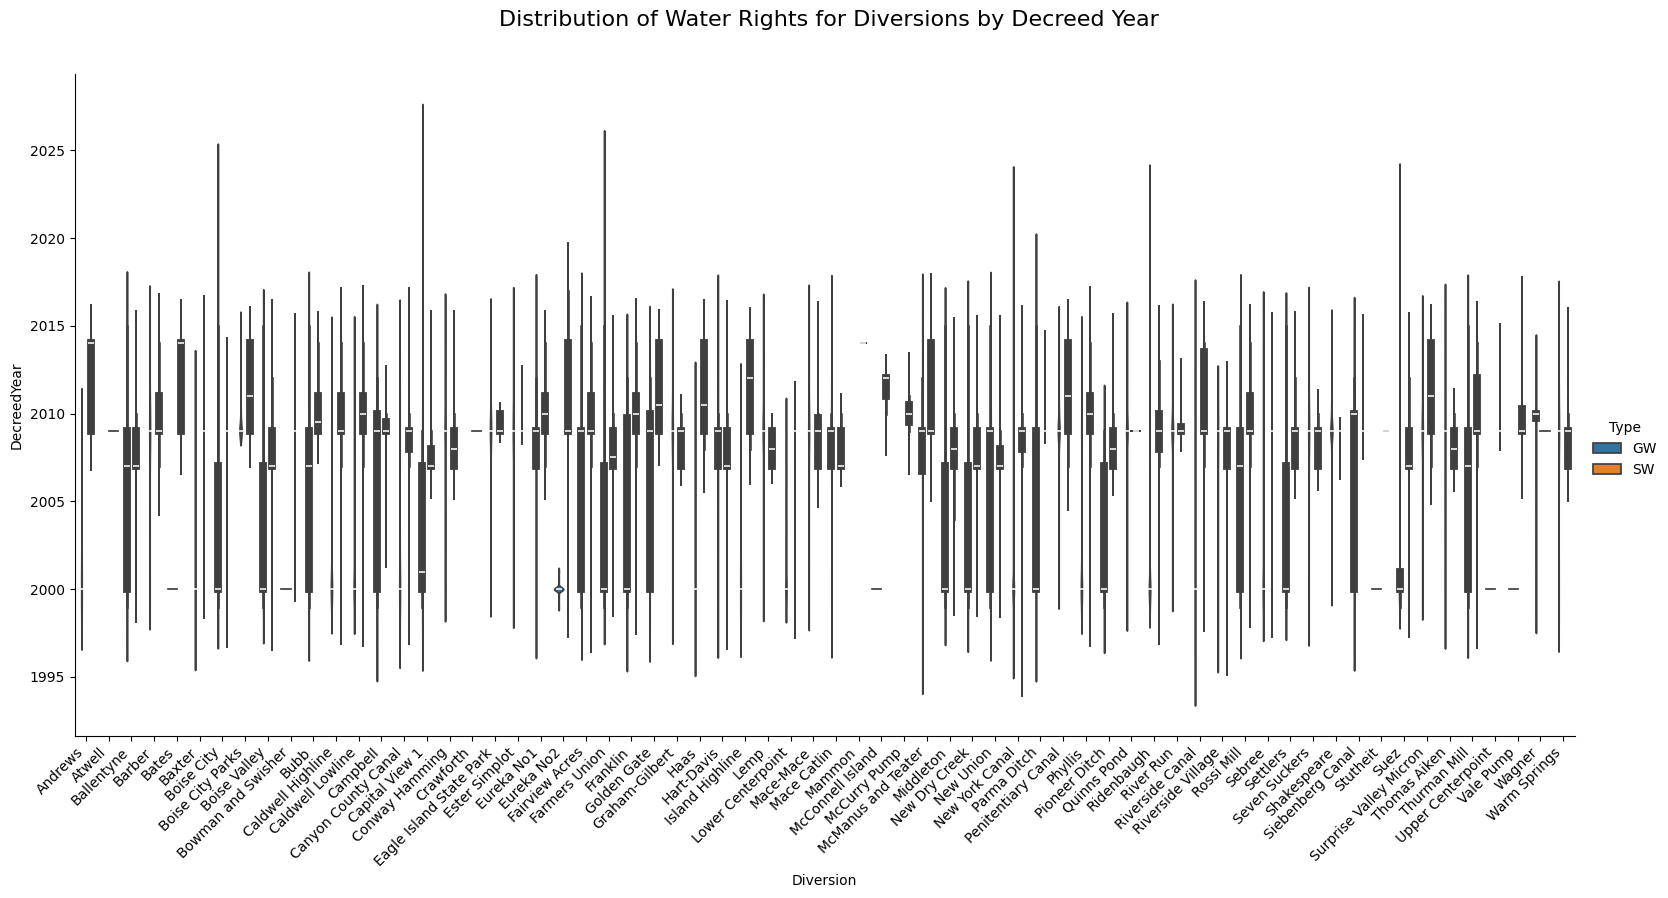

In [12]:
# ----------------------------------- #
#   SW/GW Comparison in Diversions
#         Decreed Year
# ----------------------------------- #

#violin plot of all drainages

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')

# Convert DecreedDat to datetime format and get year
file['DecreedDat'] = pd.to_datetime(file['DecreedDat'])
file['DecreedYear'] = file['DecreedDat'].dt.year

plot = sns.catplot(
    data=file, x="Diversion", y="DecreedYear", hue="Type",
    kind="violin", height=8, aspect=2)  # Increase height and aspect ratio for larger plot

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Diversions by Decreed Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

<ipython-input-13-e76ff32e1780>:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')


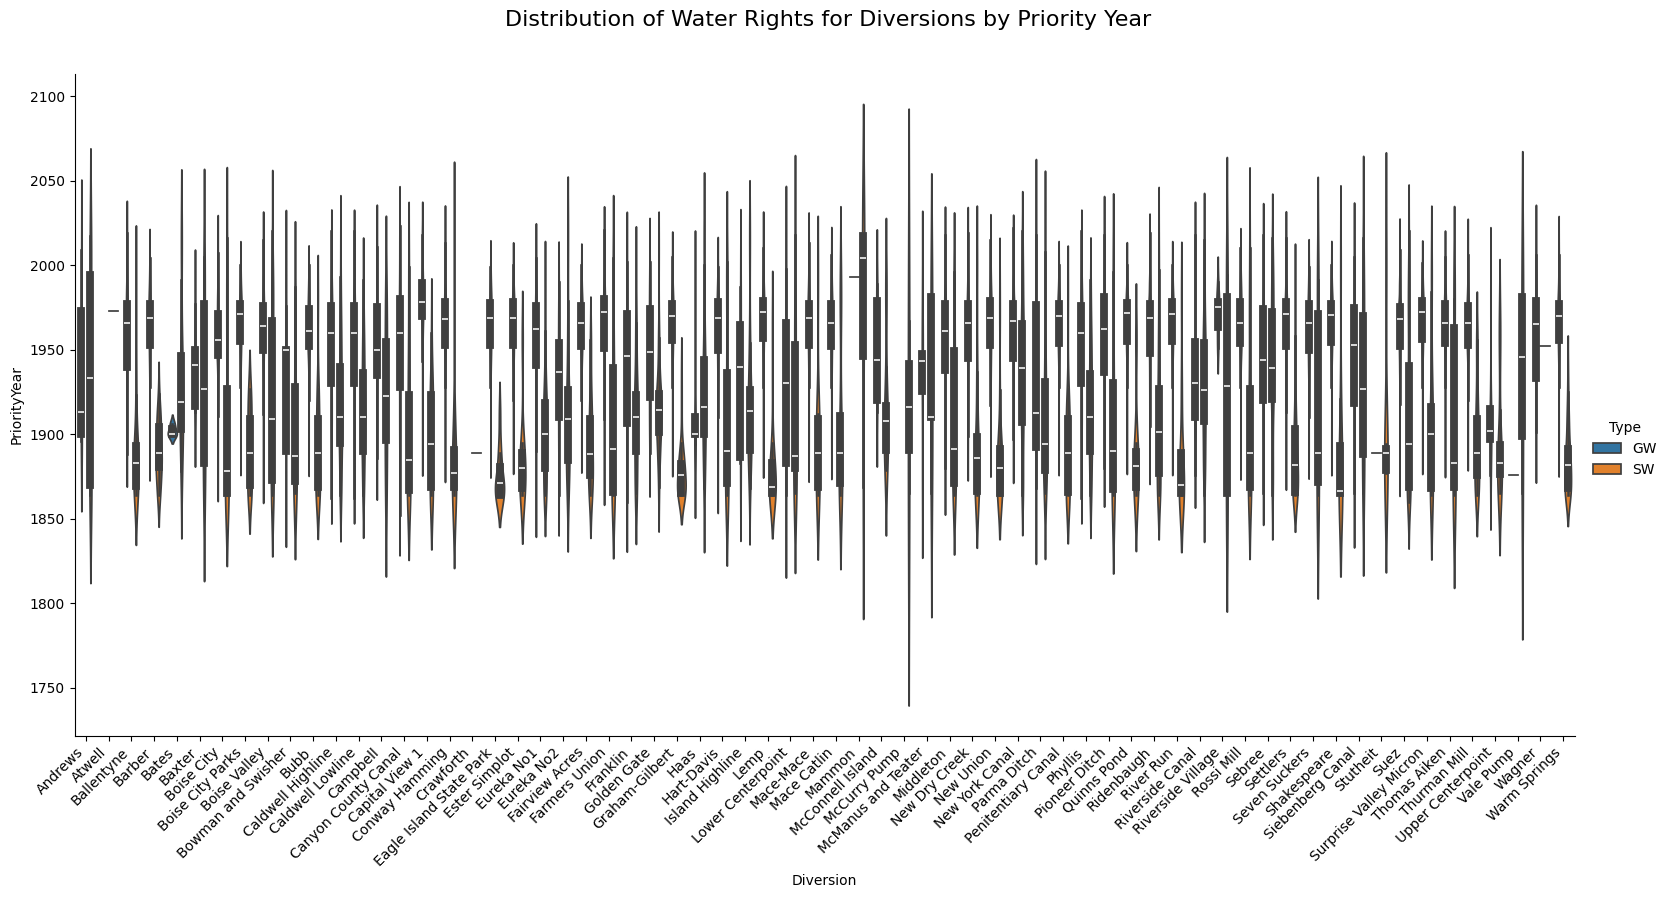

In [13]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds
#       Priority Year
# ----------------------------------- #

#violin plot of all drainages

# Load the data
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/div_water_rights/div_wr.csv')

# Convert DecreedDat to datetime format
file['PriorityDa'] = pd.to_datetime(file['PriorityDa'])

# Extract the year from DecreedDat
file['PriorityYear'] = file['PriorityDa'].dt.year

# Plot using sns.catplot
plot = sns.catplot(
    data=file, x="Diversion", y="PriorityYear", hue="Type",
    kind="violin", height=8, aspect=2)  # Increase height and aspect ratio for larger plot

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Diversions by Priority Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()